In [1]:
import sys
sys.path.append('..')

from helper_fun import *
import helper_fun
from Split_functions_classify.splits_two import *
from Split_functions_classify.splits_three import *
from Split_functions_classify.splits_ten import *

SEED = 22
seed_everything(SEED)

compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')
compounds.head(2)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040


In [2]:
two_split(compounds)
three_split(compounds)
ten_split(compounds).head()
compound_df = compounds.copy()
compound_df["maccs"] = compound_df["SMILES"].apply(smiles_to_fp,)

In [3]:
#change variables to _2 at end
fingerprint_to_model = compound_df.maccs.tolist()
label_to_model_2 = compound_df.bin_2.tolist()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_2,
    static_test_x_2,
    static_train_y_2,
    static_test_y_2,
) = train_test_split(fingerprint_to_model, label_to_model_2, test_size=0.2, random_state=SEED)
splits_2 = [static_train_x_2, static_test_x_2, static_train_y_2, static_test_y_2]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_2))
print("Test data size:", len(static_test_x_2))


Training data size: 476
Test data size: 119


In [4]:
# Specify models for 3 bin types
model_SVM_2 = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
model_SVM_3 = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)
model_SVM_10 = svm.SVC(kernel="rbf", C=1, gamma=0.1, probability=True)

In [5]:

# Append SVM model
# models.append({"label": "Model_SVM", "model": model_SVM})


In [6]:
#models_RF_2 = [{"label": "RF: 2 Split", "model": model_RF_2}]
# # models_RF.append({"label": "RF: 3 Split", "model": model_RF_3})
# # models_RF.append({"label": "RF: 10 Split", "model": model_RF_10})
#plot_roc_curves_for_models(models_RF_2, static_test_x_2, static_test_y_2)

## 2 Bin ##

In [7]:
performance_measures = model_training_and_validation(model_SVM_2, "SVM", splits_2)

Sensitivity: 0.75
Specificity: 0.73
AUC: 0.82


### ROC curve ###

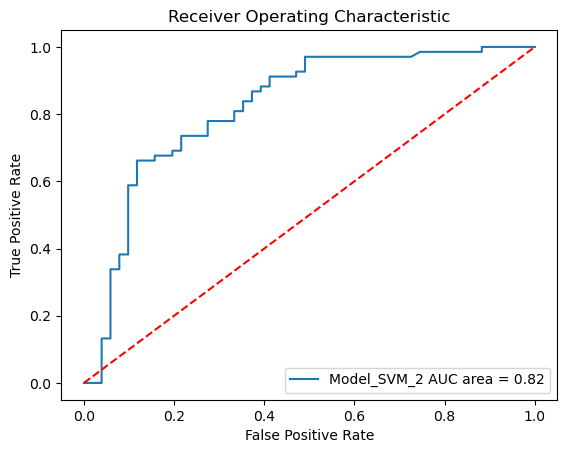

In [8]:
# Create a list for our models
models = [{"label": "Model_SVM_2", "model": model_SVM_2}]
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2, False);

### MCC - helps us determine quality of binary classifications ### 

MCC takes a value between -1 and 1

In [9]:
y_pred_SVM_2 = model_SVM_2.predict(static_test_x_2)
matthews_corrcoef_SVM_2 = matthews_corrcoef(static_test_y_2,y_pred_SVM_2)
print("The matthews correlation coefficient is:",matthews_corrcoef_SVM_2)

The matthews correlation coefficient is: 0.47263682151545466


### F1 score ###

F1 score takes a value between 0 and 1

In [10]:
f1_score_SVM_2 = f1_score(static_test_y_2,y_pred_SVM_2)
print("F1 score is:",f1_score_SVM_2)

F1 score is: 0.7669172932330827


# 3 bin #

Make our training and test data for the 3 split

In [11]:
label_to_model_3 = compound_df.bin_3.to_list()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_3,
    static_test_x_3,
    static_train_y_3,
    static_test_y_3,
) = train_test_split(fingerprint_to_model, label_to_model_3, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_3, static_test_x_3, static_train_y_3, static_test_y_3]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_3))
print("Test data size:", len(static_test_x_3))

Training data size: 476
Test data size: 119


In [12]:
bins_label_3 = ['low','medium','high']

In [13]:
model_SVM_3.fit(static_train_x_3,static_train_y_3)
test_prob_3 = model_SVM_3.predict_proba(static_test_x_3)

### Plot the ROC curves using One vs Rest and micro-averaging ###

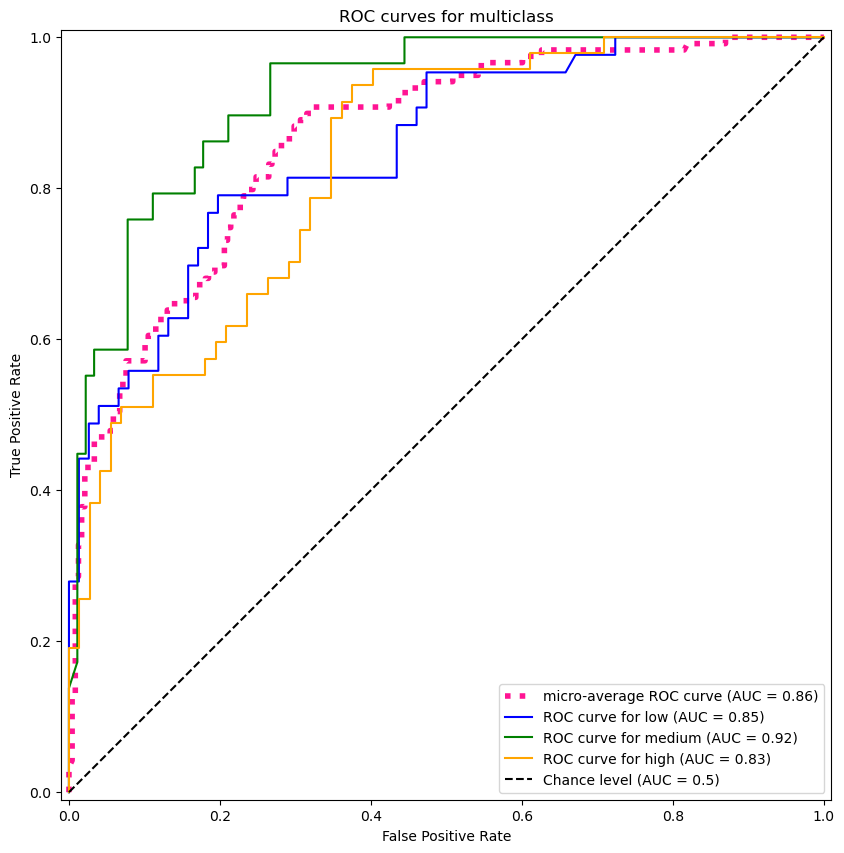

In [14]:
plot_roc_for_multi_class(model_SVM_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

### MCC for 3 classes ###

In [15]:
y_pred_SVM_3 = model_SVM_3.predict(static_test_x_3)
matthews_corrcoef_SVM_3 = matthews_corrcoef(static_test_y_3,y_pred_SVM_3)
print("MCC:",matthews_corrcoef_SVM_3)

MCC: 0.5027997465589752


This shows bad performance when we drastically increase the number of bins

### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [16]:
f1_score_SVM_3 = f1_score(static_test_y_3,y_pred_SVM_3,average="micro")
print("F1 score using micro average is:",f1_score_SVM_3)

F1 score using micro average is: 0.6722689075630253


In [17]:
f1_score_SVM_3 = f1_score(static_test_y_3,y_pred_SVM_3,average="macro")
print("F1 score using macro average is:",f1_score_SVM_3)

F1 score using macro average is: 0.6795899805257489


# 10 bin #

In [18]:
label_to_model_10 = compound_df.bin_10.to_list()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_10,
    static_test_x_10,
    static_train_y_10,
    static_test_y_10,
) = train_test_split(fingerprint_to_model, label_to_model_10, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_10, static_test_x_10, static_train_y_10, static_test_y_10]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_10))
print("Test data size:", len(static_test_x_10))

Training data size: 476
Test data size: 119


In [21]:
bins_label_10 = ['0','1','2','3','4','5','6','7','8','9']

In [22]:
model_SVM_10.fit(static_train_x_10,static_train_y_10)
test_prob_10 = model_SVM_10.predict_proba(static_test_x_10)

### Plot the ROC curves using One vs Rest and micro-averaging ###

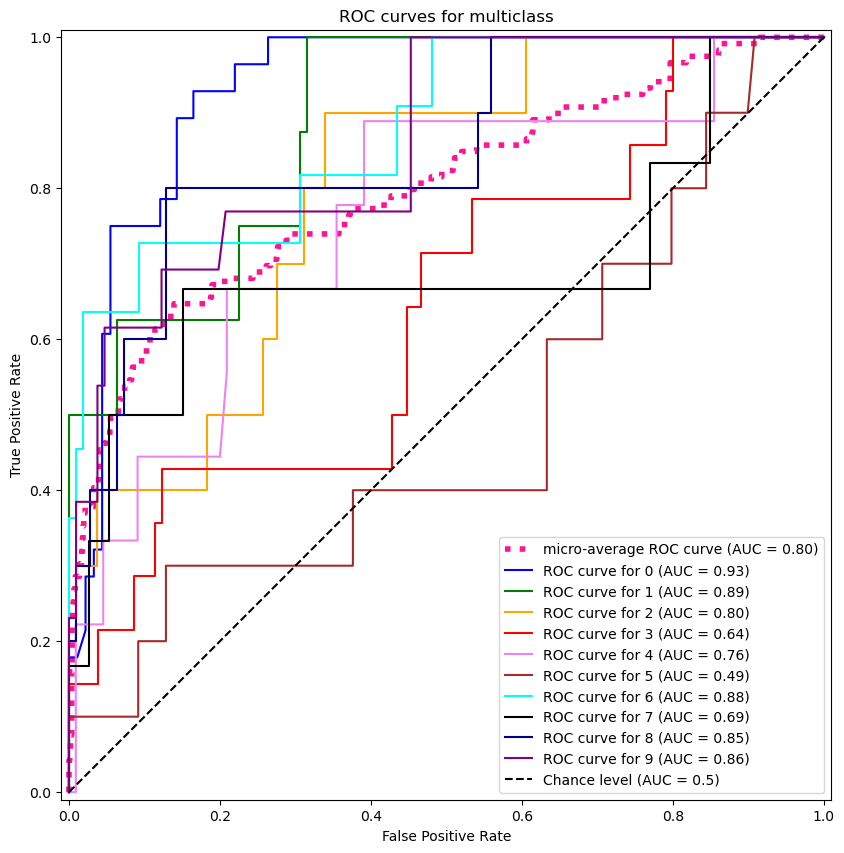

In [23]:
plot_roc_for_multi_class(model_SVM_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

### MCC for 10 classes ###

In [24]:
y_pred_SVM_10 = model_SVM_10.predict(static_test_x_10)
matthews_corrcoef_SVM_10 = matthews_corrcoef(static_test_y_10,y_pred_SVM_10)
print("MCC:",matthews_corrcoef_SVM_10)

MCC: 0.3924885121095838


### F1 for multi-class (10 classes here) ###

Have to specify average as this is not a binary class

In [25]:
f1_score_SVM_10 = f1_score(static_test_y_10,y_pred_SVM_10,average="micro")
print("F1 score using micro average is:",f1_score_SVM_10)

F1 score using micro average is: 0.47058823529411764


In [26]:
f1_score_SVM_10 = f1_score(static_test_y_10,y_pred_SVM_10,average="macro")
print("F1 score using macro average is:",f1_score_SVM_10)

F1 score using macro average is: 0.3896251898226917
